## Model Training

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\StudentPerformance\data\stud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [20]:
df["average_score"] = (df["math_score"] + df["reading_score"] + df["writing_score"]) / 3

In [37]:
X = df.drop(columns=['math_score', 'reading_score', 'writing_score',"average_score"],axis=1)
y = df['average_score'].round(2)

In [38]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [39]:
y.head()

0    72.67
1    82.33
2    92.67
3    49.33
4    76.33
Name: average_score, dtype: float64

In [40]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [41]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [42]:
X = preprocessor.fit_transform(X)

In [43]:
X.shape

(1000, 17)

In [44]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 17), (200, 17))

#### Create an Evaluate Function to give all metrics after model Training

In [45]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 12.1956
- Mean Absolute Error: 9.9360
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.4017
- Mean Absolute Error: 10.4903
- R2 Score: 0.1622


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 11.7297
- Mean Absolute Error: 9.3592
- R2 Score: 0.3102
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15.5701
- Mean Absolute Error: 12.3394
- R2 Score: -0.1309


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 10.8647
- Mean Absolute Error: 8.6218
- R2 Score: 0.4082
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15.1631
- Mean Absolute Error: 11.8286
- R2 Score: -0.0725


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 10.9442
- Mean Absolute Error: 8.8310
- R2

### Results

In [47]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.162171
6,AdaBoost Regressor,0.096670
3,Random Forest Regressor,-0.034609
5,CatBoosting Regressor,-0.044599
4,XGBRegressor,-0.072519
2,Decision Tree,-0.072533
1,K-Neighbors Regressor,-0.130882


## Linear Regression

In [48]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 16.22


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

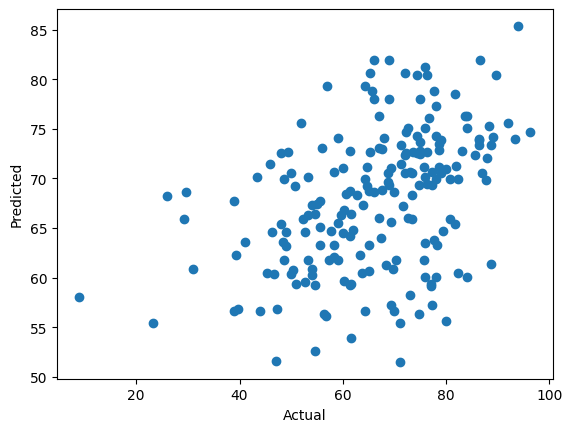

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

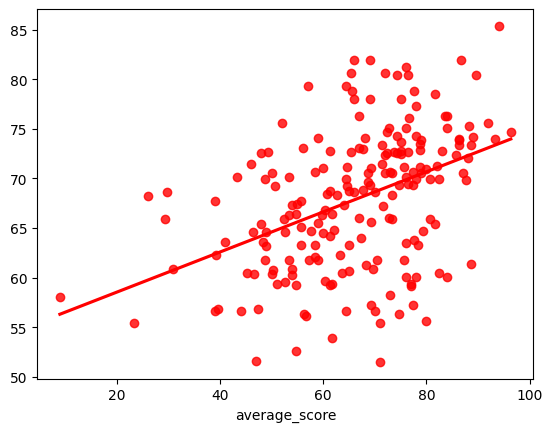

In [50]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.00,70.522712,16.477288
737,64.00,67.280869,-3.280869
740,75.00,72.796365,2.203635
660,74.67,56.368496,18.301504
411,81.67,78.496079,3.173921
...,...,...,...
408,55.00,67.399444,-12.399444
332,57.00,79.350523,-22.350523
208,77.00,59.403057,17.596943
613,72.00,70.522712,1.477288
